In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
import plotly.express as px


In [39]:
# Load data
data = pd.read_csv('../../data/Housing.csv')

In [40]:
data.shape

(545, 13)

In [41]:
data.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [42]:
# maping
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

# Hot encoding
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)




In [43]:
# outliers 
plt.figure(figsize=(20, 5))
px.box(data, y='price')


<Figure size 2000x500 with 0 Axes>

In [45]:
# split

X = data.drop('price', axis=1)

y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





In [47]:
# model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)



Ridge(alpha=0.1)

In [48]:
# predict and score

y_pred = ridge.predict(X_test)

metrics.r2_score(y_test, y_pred)







0.6462812813242442

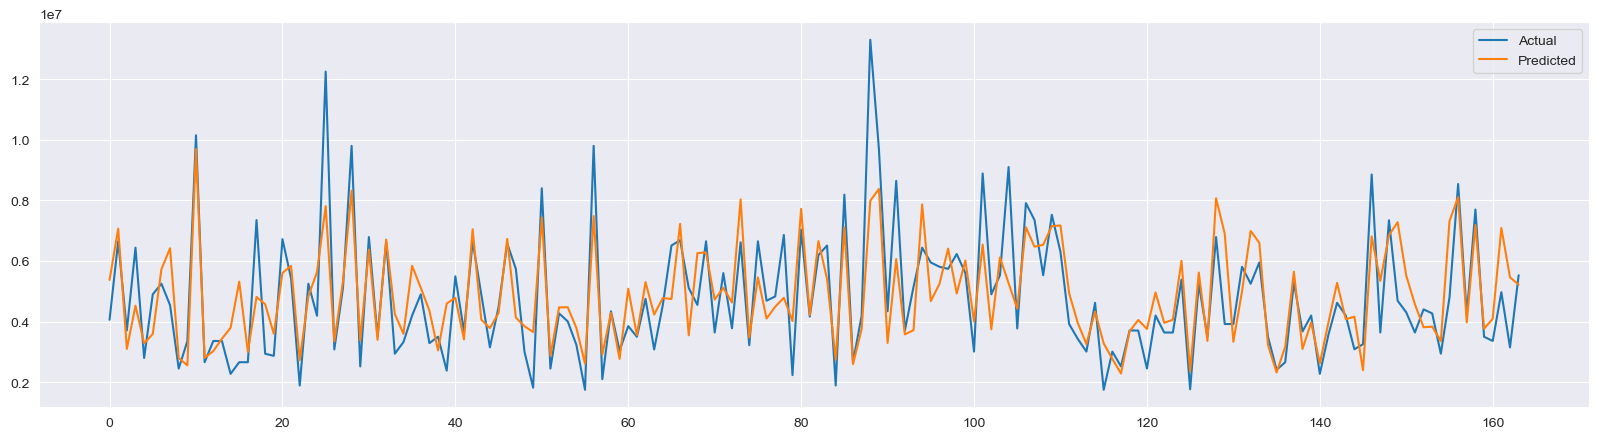

In [49]:
# plot
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


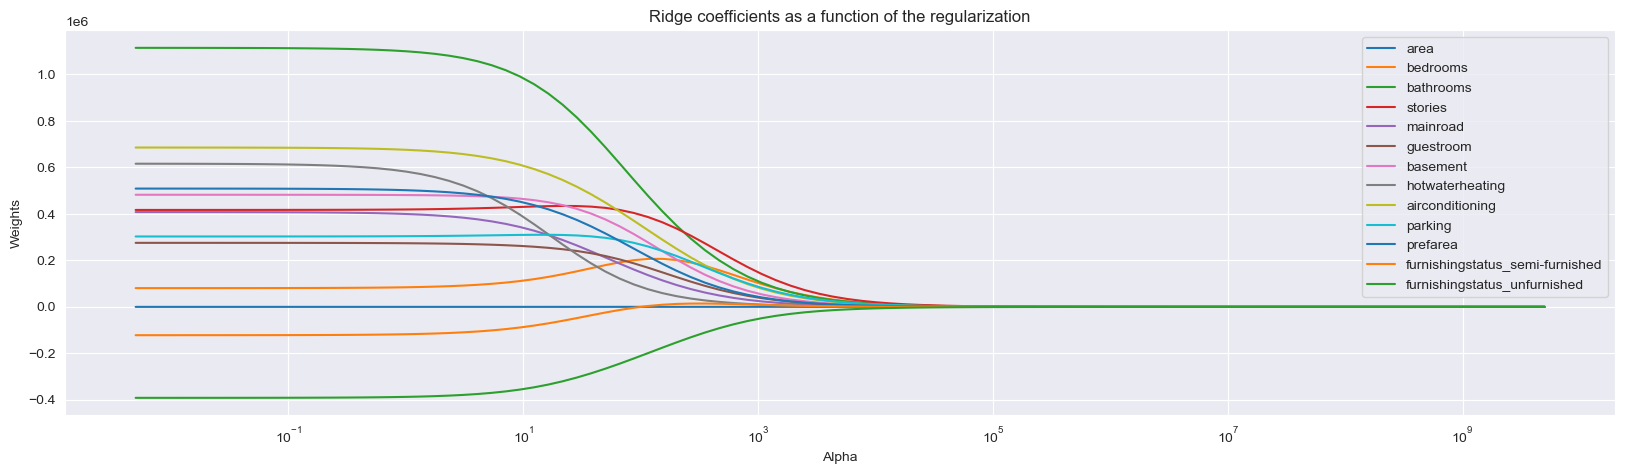

In [62]:
# plot alpha

alphas = 10**np.linspace(10, -2, 100)*0.5

coefficient = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    coefficient.append(ridge.coef_)
    
coefficient = np.array(coefficient)

plt.figure(figsize=(20, 5))
plt.plot(alphas, coefficient)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(X.columns)
plt.show()


    


0.0